# Can we use perplexity as a metric to detect AI generated text?

### Why this notebook?
With the rise of Generative AI in education, there is a growing need for teachers to check whether a text is written by a human or an AI. A possible metric to detect AI generated text is perplexity. In this notebook we will compare 5 AI generated texts with 5 human generated texts, calculate their perplexity and compare results.

### TL;DR
Yes, this works. (For the small set of given texts that is).

### Contents
0. Install packages
1. Settings
2. Getting perplexity for 5 openAI generated texts
3. Getting the perplexity for 5 human written texts
4. Comparing results and conclusion

## Calculating perplexity

### Sources
- blog: https://medium.com/@priyankads/perplexity-of-language-models-41160427ed72
- wiki: https://en.wikipedia.org/wiki/Perplexity
- o'reilly: https://www.oreilly.com/library/view/natural-language-processing/9781787285101/ch21s05.html (to do)

## 0. Install packages

In [1]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


## 1. Settings

In [116]:
#set API keys
import os
import config
os.environ['OPENAI_API_KEY'] = config.openai_key # replace with your API-key, but don't keep it in your source code :-)

In [117]:
#OpenAI settings
import openai  # for calling the OpenAI API

# models
EMBEDDING_MODEL = "text-embedding-ada-002" #choose your embeddings model
GPT_MODEL = "gpt-3.5-turbo" #choose the generative model

## 1. First perplexity result

In [6]:
import transformers
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [8]:
inputs = tokenizer("ABC is a startup based in New York City and Paris", return_tensors = "pt")
loss = model(input_ids = inputs["input_ids"], labels = inputs["input_ids"]).loss
ppl = torch.exp(loss)
print(ppl)

tensor(29.4841, grad_fn=<ExpBackward0>)


In [9]:
inputs_wiki_text = tokenizer("Generative Pretrained Transformer is an opensource artificial intelligence created by OpenAI in February 2019", return_tensors = "pt")
loss = model(input_ids = inputs_wiki_text["input_ids"], labels = inputs_wiki_text["input_ids"]).loss
ppl = torch.exp(loss)
print(ppl)

tensor(211.8132, grad_fn=<ExpBackward0>)


## 2. Getting perplexity for 5 openAI generated texts

In [118]:
query_list = []
with open ('prompts_en.txt', mode='r') as prompts:
    for prompt in prompts: #for each row do the following
        #query = prompt.split()
        query_list.append(prompt)
query_list

In [120]:
oa_result_list =[] 
for i in range(len(query_list)):
    query = query_list[i]

    response = openai.ChatCompletion.create(
        messages=[
            {'role': 'system', 'content': ''},
            {'role': 'user', 'content': query},
        ],
        model=GPT_MODEL,
        temperature=0, #temperature is a parameter about the entropy of the model (the higher, the greater variation in results)
    )

    #print(response['choices'][0]['message']['content'])
    openai_result = response['choices'][0]['message']['content']
    oa_result_list.append(openai_result)

In [121]:
print(len(oa_result_list))
print(oa_result_list)

5
['A perceptron is a type of artificial neural network that is used for supervised learning. It consists of a single layer of artificial neurons that are connected to each other. Each neuron receives input from the previous layer and produces an output that is passed on to the next layer.\n\nA multi-layered perceptron (MLP) is a type of neural network that consists of multiple layers of artificial neurons. The first layer receives input from the outside world, and each subsequent layer receives input from the previous layer. The output of the last layer is the final output of the network.\n\nMLPs are used for a variety of tasks, including classification, regression, and pattern recognition. They are particularly useful for tasks that involve complex input data, such as images or speech. MLPs can be trained using a variety of algorithms, including backpropagation, which adjusts the weights of the connections between neurons to minimize the error between the predicted output and the act

In [122]:
#getting the perplexity tensor for the openai generated text
perplexity_list =[]
for i in range(len(oa_result_list)):
    inputs_wiki_text = tokenizer(oa_result_list[i], return_tensors = "pt")
    loss = model(input_ids = inputs_wiki_text["input_ids"], labels = inputs_wiki_text["input_ids"]).loss
    ppl = torch.exp(loss)
    print(ppl)
    perplexity_list.append(ppl)

tensor(7.3233, grad_fn=<ExpBackward0>)
tensor(6.3016, grad_fn=<ExpBackward0>)
tensor(9.1592, grad_fn=<ExpBackward0>)
tensor(6.9893, grad_fn=<ExpBackward0>)
tensor(7.5752, grad_fn=<ExpBackward0>)


In [124]:
#converting tensors to string and getting just the values
ai_text_perplexity= []
for i in range(len(perplexity_list)):
    tensor_string=str(perplexity_list[i])
    a,b = tensor_string.split(",")
    tensor, perplexity = a.split("(")
    ai_text_perplexity.append(float(perplexity))
ai_text_perplexity

[7.3233, 6.3016, 9.1592, 6.9893, 7.5752]

## 3. Getting the perplexity for 5 human written texts

In [48]:
humantext1="The task for Ukraine, bluntly, is to show Vladimir Putin, his henchmen, his compatriots and the wider watching world that Russia cannot win; that this invasion has been misconceived from the outset; that Russia cannot outlast Ukraine and its Western backers; and that the Kremlin’s best option is to give up before Russia suffers yet more losses and humiliation. That is no easy task, and the risk of failure is real. But thanks to Ukraine’s astonishing determination, and the strong and unexpectedly united backing of the West, success is possible. It requires, right now, the strongest diplomatic and military support, and the clearest commitment from the West that it will stand by Ukraine for many years to come. Mr Putin must no longer be able to lie to himself or his people about the foolishness of the direction he has chosen. This is why this moment is so critical. The Russians are well dug in and reinforced after months of a mobilisation drive that has replenished the supply of cannon-fodder. Imagine the worst case: that Ukraine’s counter-offensive peters out, its troops spread too thin, or used too sparingly, to make an impact.If that happens, it would be a damaging failure. Despite the Russian army’s woeful performance in the months-long fight to take the city of Bakhmut, it would nonetheless start to seem well matched against Ukraine’s. The voices urging Ukraine to stop fighting and start talking would grow louder, even though a ceasefire would leave Russia in possession of almost 20% of Ukraine and Russian promises of peace would be worthless.This would be a win for Mr Putin—not the total victory he once dreamed of, but success in his backup objective, to cripple Ukraine if it cannot be returned to the Russian imperium. There would be recriminations within nato and the European Union. In America, as it heads towards a divisive presidential election, the pressure to cut back funds that Republican critics already claim are being wasted would grow. In Europe the backsliders would slide further."

In [60]:
pp_list_human=[]
inputs_wiki_text = tokenizer(humantext1, return_tensors = "pt")
loss = model(input_ids = inputs_wiki_text["input_ids"], labels = inputs_wiki_text["input_ids"]).loss
ppl = torch.exp(loss)
print(ppl)
pp_list_human.append(ppl)

tensor(33.4864, grad_fn=<ExpBackward0>)


In [50]:
humantext2 ='Ukraine’s counter-offensive is just a few days old. But its shape is gradually becoming clearer. One axis points east, at the area around the bloodily contested town of Bakhmut and in Luhansk province. Another aims south and south-east from Vuhledar in Donetsk province. The third is perhaps the most important. On June 8th it became apparent that Ukraine had launched a major southward assault in Zaporizhia province, which forms the central part of the war’s long frontline. It looks like the biggest one yet.Although the attack began earlier, overnight on June 8th Ukrainian troops advanced in two prongs from Orikhiv, a small Ukrainian-held town, according to a source familiar with the course of fighting. One advance hugged the Konka river, a tributary of the Dnieper that snakes east of the town. The other occurred further east. Russian military bloggers on Telegram, a messaging platform, described a fierce assault with heavy artillery bombardment and the use of tanks.Russia’s defence ministry claimed to have repelled an attack in Novodarivka, which lies almost 70km east of Orikhiv. On June 8th Yevgeny Balitsky, the leader of Russia’s puppet government in the occupied part of Zaporizhia, ordered residents in Tokmak and a pair of towns on either side, Vasylivkahere was reportedly heavy fighting around the area.'

In [61]:
inputs_wiki_text = tokenizer(humantext2, return_tensors = "pt")
loss = model(input_ids = inputs_wiki_text["input_ids"], labels = inputs_wiki_text["input_ids"]).loss
ppl = torch.exp(loss)
print(ppl)
pp_list_human.append(ppl)

tensor(33.2663, grad_fn=<ExpBackward0>)


In [52]:
humantext3 ='There are some early signs that the attack in Zaporizhia differs from those in the east and south. One is the scale and intensity of the Ukrainian assault. Another is the equipment that is being used. Drone images published by Russian media appear to show German Leopard tanks, including the most advanced 2a6 variants; American Bradley armoured fighting vehicles; and m113 armoured personnel carriers in Mala Tokmachka, a village to the east of Orikhiv. That would suggest that Ukraine has committed several of its nine Western-armed and -trained brigades—including some of the best-equipped ones, according to leaked Pentagon documents from February—in the area.'

In [62]:
inputs_wiki_text = tokenizer(humantext3, return_tensors = "pt")
loss = model(input_ids = inputs_wiki_text["input_ids"], labels = inputs_wiki_text["input_ids"]).loss
ppl = torch.exp(loss)
print(ppl)
pp_list_human.append(ppl)

tensor(43.2825, grad_fn=<ExpBackward0>)


In [55]:
humantext4 ='Military experts and officials had long thought that Zaporizhia was a logical place for Ukraine to focus its offensive. Its position at the heart of the frontline means that any attack there could trap large numbers of Russian troops in a pocket to the west, in Kherson province. Many could also be trapped in Crimea itself, if Ukraine managed to strike the bridge over the Kerch strait again. If Ukraine could get to the key city of Melitopol, it could strike at Russian road and rail supply lines running westwards to Crimea, in essence severing the so-called land bridge that connects Russian territory to the occupied peninsula. Just getting to within artillery range of the links would also cause big problems for Russia.'

In [63]:
inputs_wiki_text = tokenizer(humantext4, return_tensors = "pt")
loss = model(input_ids = inputs_wiki_text["input_ids"], labels = inputs_wiki_text["input_ids"]).loss
ppl = torch.exp(loss)
print(ppl)
pp_list_human.append(ppl)

tensor(32.7452, grad_fn=<ExpBackward0>)


In [58]:
humantext5='For the same reason, Russia has assiduously built multiple lines of defence in Zaporizhia north of Tokmak, stretching back 30km, drone and satellite imagery shows. These include trenches, shelters, anti-tank ditches and obstacles, and minefields. Tokmak itself is entirely surrounded by circular ditches that can house anti-tank teams and multiple strongpoints, notes Pasi Paroinen, a Finnish reserve army officer who analyses such imagery.'

In [64]:
inputs_wiki_text = tokenizer(humantext5, return_tensors = "pt")
loss = model(input_ids = inputs_wiki_text["input_ids"], labels = inputs_wiki_text["input_ids"]).loss
ppl = torch.exp(loss)
print(ppl)
pp_list_human.append(ppl)

tensor(61.3427, grad_fn=<ExpBackward0>)


In [89]:
pp_list_human

[tensor(33.4864, grad_fn=<ExpBackward0>),
 tensor(33.2663, grad_fn=<ExpBackward0>),
 tensor(43.2825, grad_fn=<ExpBackward0>),
 tensor(32.7452, grad_fn=<ExpBackward0>),
 tensor(61.3427, grad_fn=<ExpBackward0>)]

In [104]:
human_text_perplexity= []
for i in range(len(pp_list_human)):
    tensor_string=str(pp_list_human[i])
    a,b = tensor_string.split(",")
    tensor, perplexity = a.split("(")
    print(float(perplexity))
    human_text_perplexity.append(float(perplexity))

33.4864
33.2663
43.2825
32.7452
61.3427


In [105]:
human_text_perplexity

[33.4864, 33.2663, 43.2825, 32.7452, 61.3427]

## 4. Comparing results and conclusion

In [125]:
#create one list
results =ai_text_perplexity+human_text_perplexity
print(results)

[7.3233, 6.3016, 9.1592, 6.9893, 7.5752, 33.4864, 33.2663, 43.2825, 32.7452, 61.3427]


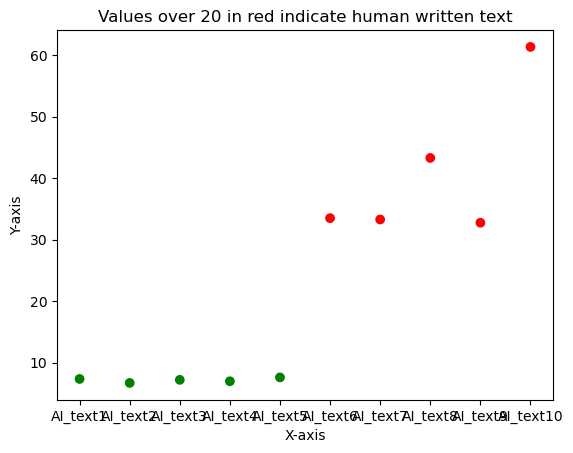

In [113]:
#create the plot
import matplotlib.pyplot as plt
x = ["AI_text1", "AI_text2", "AI_text3", "AI_text4", "AI_text5", "AI_text6","AI_text7","AI_text8","AI_text9","AI_text10"]
y = results
colors = ['red' if value > 20 else 'green' for value in y]

# Create scatter plot
plt.scatter(x, y, c=colors)

# Customize plot
plt.title('Values over 20 in red indicate human written text')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.show()

In this notebook we've compared 5 AI generated texts with 5 texts written by humans and calculated their perplexity. When we plotted the results we see a difference between AI-generated texts (low perplexity) and human written text (high perplexity). 

Without doubt, more testing is needed, especially with other types of text, to get more reliable results.